<a href="https://colab.research.google.com/github/NikolaZubic/AppliedGameTheoryHomeworkSolutions/blob/main/domaci2_dodatni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DRUGI DODATNI DOMAĆI ZADATAK iz predmeta "Primenjena teorija igara" (Applied Game Theory)


Odabir optimalne politike odlučivanja koristeći Markovljev Proces Odlučivanja (Markov Decision Process) na grafu.

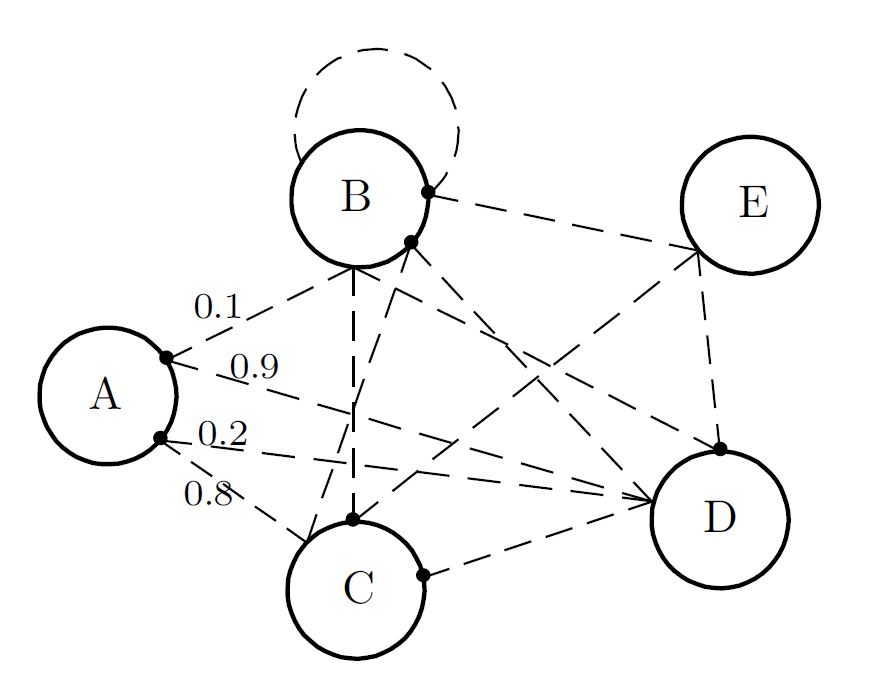

# Potrebni import-i

In [12]:
import csv
from prettytable import PrettyTable

# Pomoćne funkcije

In [13]:
def read_files(state_transitions_path, rewards_path):
    """
    Reads transitions and rewards from files.
    :param state_transitions_path: file path for transitions
    :param rewards_path: file path for rewards
    :return: return transitions and rewards collections
    """
    transitions, rewards_for_state = {}, {}

    """
    Read transitions from file into "transitions" dictionary.
    "transitions" dictionary format: 
    {STATE_1: {'ACTION_1': [(0.1, STATE_2), (0.3, STATE_3)], 'ACTION_2' : [] ... 'ACTION_N': []},
     STATE_2,...,
     STATE_N}
    """
    with open(state_transitions_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')

        # row example: A,TOP,B,0.1
        for row in csv_reader:
            if row[0] in transitions:
                # if we already have that action
                if row[1] in transitions[row[0]]:
                    transitions[row[0]][row[1]].append((float(row[3]), row[2]))
                else:
                    # if that's the new action
                    transitions[row[0]][row[1]] = [(float(row[3]), row[2])]
            else:
                # if we don't have that state
                transitions[row[0]] = {row[1]: [(float(row[3]), row[2])]}

    # Read rewards from file into 'rewards_for_state' dictionary: {'A': REWARD_VALUE_1, 'B': REWARD_VALUE_2, ...}
    with open(rewards_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')

        # row example: A,1
        for row in csv_reader:
            rewards_for_state[row[0]] = float(row[1]) if row[1] != 'None' else None

    return transitions, rewards_for_state

**Tranzicije**:

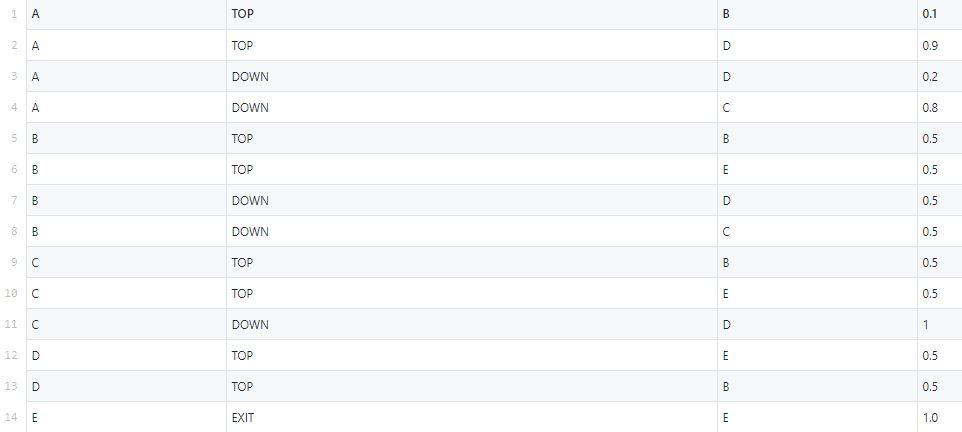

**Nagrade**:

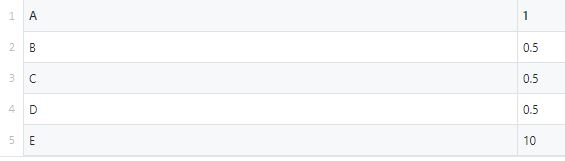

In [14]:
def print_table(columns, collection):
    """
    Prints report table.
    :param columns: columns of table
    :param collection: table content imported from some collection
    :return: None, prints out table
    """
    t = PrettyTable(columns)
    for s in collection:
        t.add_row([s, collection[s]])
    print(t)

# Markovljev Proces Odlučivanja

In [15]:
class MarkovDecisionProcess(object):
    """
    Markov Decision Process is a Markov Reward Process + actions
    Definition of MDP:
        * S is a (finite) set of Markov states s € S
        * A is a (finite) set of actions a € A
        * P is dynamics/transition model for each action, that specifies P(s_t+1 = s' | s_t = s, a_t = a)
        * R is a reward function: R(s_t = s, a_t = a) = E[r_t | s_t = s, a_t = a]
        * Discount factor gamma € [0, 1]
    MDP is a tuple: (S, A, P, R, gamma)
    """
    def __init__(self, transitions={}, rewards={}, gamma=0.9, epsilon=0.001):
        self.S = transitions.keys()
        self.P = transitions
        self.rewards = rewards
        self.gamma = gamma
        self.epsilon = epsilon

    def R(self, state):
        return self.rewards[state]

    def A(self, state):
        return self.P[state].keys()

    def transition_probability(self, state, action):
        # list of tuples (probability_value, next_sate)
        return self.P[state][action]

    def utility(self, s, a, V):
        # utility for producing action a in state s
        return sum(
            [probability_value * V[next_state] for (probability_value, next_state) in self.transition_probability(s, a)]
        )

    # Solving the MDP by value iteration
    def value_iteration(self):
        states = self.S
        actions = self.A
        P = self.transition_probability
        R = self.R

        # Initialize V_0(s) = 0 for all states s ; [0 0 0 0 0]
        V_next = {s: 0 for s in states}

        # Loop until [finite horizon, convergence]
        while True:
            V = V_next.copy()
            convergence_factor = 0

            for s in states:
                # Bellman update
                V_next[s] = R(s) + self.gamma * max([
                    sum([probability_value * V[next_state] for (probability_value, next_state) in P(s, a)])
                    for a in actions(s)
                ])

                convergence_factor = max(convergence_factor, abs(V_next[s] - V[s]))

                if convergence_factor < self.epsilon * (1 - self.gamma) / self.gamma:
                    return V

# Izračunavanje politike

In [16]:
class Policy(object):
    """
    Policy specifies what action to take in each state.
    Given a state, specifies a distribution over actions.
    Policy: PI(a|s) = P(a_t = a | s_t = s)

    MDP + PI(a|s) = Markov Reward Process
    Precisely, it is the MRP (S, P_PI, R_PI, gamma).
    """
    def __init__(self, markov_decision_process):
        self.markov_decision_process = markov_decision_process

    def optimal_policy(self, V):
        states = self.markov_decision_process.S
        actions = self.markov_decision_process.A

        PI = {}

        for s in states:
            PI[s] = max(actions(s), key=lambda a: self.markov_decision_process.utility(s, a, V))

        return PI

# Glavni program

In [17]:
def main(transitions_path, rewards_path):
    transitions, rewards_for_state = read_files(state_transitions_path=transitions_path, rewards_path=rewards_path)

    mdp = MarkovDecisionProcess(transitions=transitions, rewards=rewards_for_state)
    V = mdp.value_iteration()

    columns = ["State", "Value"]
    print_table(columns, V)

    policy = Policy(mdp)
    optimal_policy = policy.optimal_policy(V)

    columns = ["State", "Value"]
    print("\nOptimal policy is: ")
    print_table(columns, optimal_policy)

In [10]:
!wget "https://raw.githubusercontent.com/NikolaZubic/AppliedGameTheoryHomeworkSolutions/main/Homework%202/data/rewards.csv"
!wget "https://raw.githubusercontent.com/NikolaZubic/AppliedGameTheoryHomeworkSolutions/main/Homework%202/data/transitions.csv"

--2020-11-30 03:58:19--  https://raw.githubusercontent.com/NikolaZubic/AppliedGameTheoryHomeworkSolutions/main/Homework%202/data/rewards.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32 [text/plain]
Saving to: ‘rewards.csv’

rewards.csv         100%[===================>]      32  --.-KB/s    in 0s      

2020-11-30 03:58:19 (1.80 MB/s) - ‘rewards.csv’ saved [32/32]

--2020-11-30 03:58:19--  https://raw.githubusercontent.com/NikolaZubic/AppliedGameTheoryHomeworkSolutions/main/Homework%202/data/transitions.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting respo

In [18]:
transitions_path = "transitions.csv"
rewards_path = "rewards.csv"
main(transitions_path, rewards_path)

+-------+-------------------+
| State |       Value       |
+-------+-------------------+
|   A   | 75.45351641153094 |
|   B   |  82.7262436842582 |
|   C   |  82.7262436842582 |
|   D   |  82.7262436842582 |
|   E   | 99.99897095698545 |
+-------+-------------------+

Optimal policy is: 
+-------+-------+
| State | Value |
+-------+-------+
|   A   |  DOWN |
|   B   |  TOP  |
|   C   |  TOP  |
|   D   |  TOP  |
|   E   |  EXIT |
+-------+-------+
